In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
training_data_dir = r".\Data\Spirals\data2\spiral\training"
testing_data_dir = r".\Data\Spirals\data2\spiral\testing"

## Done manually

In [3]:
CATEGORIES = ['healthy', 'parkinson']

In [4]:
for category in CATEGORIES:
    path = os.path.join(training_data_dir, category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path, img))

In [5]:
img_array.shape

(256, 256, 3)

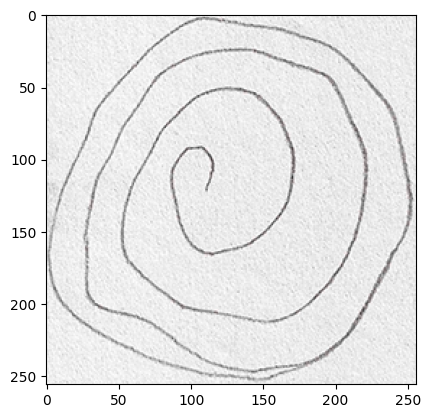

In [6]:
IMG_SIZE = 256

new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data(directory):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img))
                new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print('Something went wrong with this image!')
                
create_training_data(training_data_dir)

Something went wrong with this image!


In [8]:
print(len(training_data))

102


In [9]:
import random

random.shuffle(training_data)

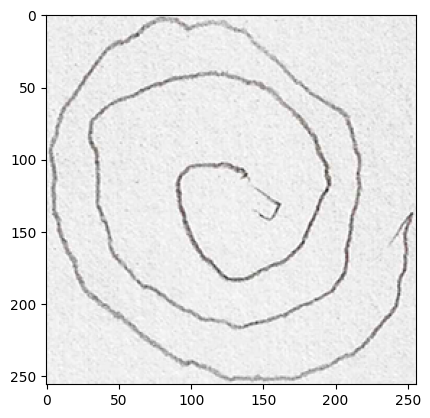

1


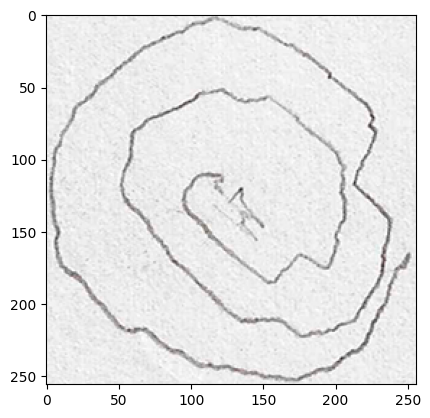

1


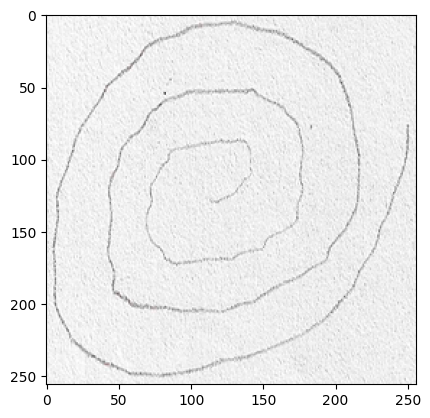

0


In [10]:
for sample in training_data[:3]:
    plt.imshow(sample[0])
    plt.show()
    print(sample[1])

## Data info

Parkinson's images is named class "1" and healthy as class "0"

In [11]:
train_X = []
train_y = []

In [12]:
for features, label in training_data:
    train_X.append(features)
    train_y.append(label)

In [13]:
train_X = np.array(train_X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)/256
train_y = np.array(train_y)

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))

optimizer = Adam(learning_rate=0.0005)

In [16]:
model.compile(optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training

In [18]:
# For some reason the validation loss is not really improving and the validation accuracy stays exactly the same when using
# softmax activation. When using sigmoid it works like it should but only outputs 0 or 1 and not a percentage.

hist = model.fit(train_X, train_y, batch_size=12, epochs=20, validation_split=0.3)

Epoch 1/20
6/6 [==============================] - 2s 235ms/step - loss: 1.7143 - accuracy: 0.4648 - val_loss: 0.6960 - val_accuracy: 0.5806
Epoch 2/20
6/6 [==============================] - 1s 205ms/step - loss: 0.7346 - accuracy: 0.4648 - val_loss: 0.7108 - val_accuracy: 0.5806
Epoch 3/20
6/6 [==============================] - 1s 214ms/step - loss: 0.7080 - accuracy: 0.4648 - val_loss: 0.6937 - val_accuracy: 0.5806
Epoch 4/20
6/6 [==============================] - 1s 211ms/step - loss: 0.6908 - accuracy: 0.4648 - val_loss: 0.7029 - val_accuracy: 0.5806
Epoch 5/20
6/6 [==============================] - 1s 209ms/step - loss: 0.6976 - accuracy: 0.4648 - val_loss: 0.7273 - val_accuracy: 0.5806
Epoch 6/20
6/6 [==============================] - 1s 208ms/step - loss: 0.6922 - accuracy: 0.4648 - val_loss: 0.7097 - val_accuracy: 0.5806
Epoch 7/20
6/6 [==============================] - 1s 210ms/step - loss: 0.7119 - accuracy: 0.4648 - val_loss: 0.6882 - val_accuracy: 0.5806
Epoch 8/20
6/6 [====

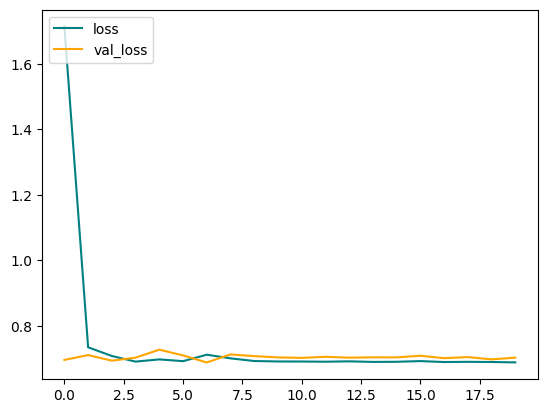

In [19]:
fig = plt.Figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

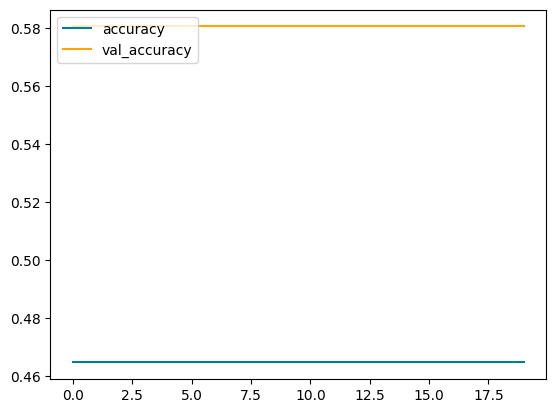

In [20]:
# As described above, the accuracies don't change with softmax.

fig = plt.Figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [21]:
# This is an example I drew myself to simulate a (very) sick parkinson's patient. This is to show the certainty
# of the model on an unseen sample.

example = plt.imread(r"Data/Spirals/data2/spiral/example.png")

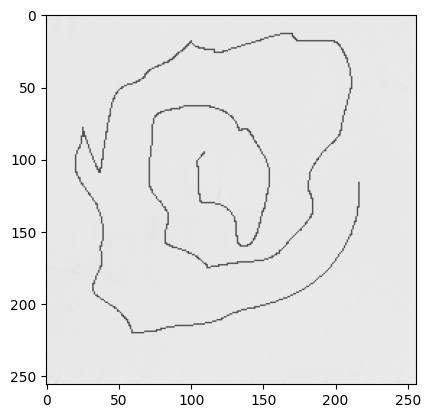

In [22]:
plt.imshow(example)

In [23]:
new_example = cv.resize(example, (IMG_SIZE, IMG_SIZE))

In [24]:
new_example.shape
new_example = np.expand_dims(new_example, 0)

In [25]:
# As can be seen it only outputs 0 or 1. Maybe the sample is too obvious but the training errors mentioned above should be solved.

result = model.predict(new_example)

if result > 0.5:
    print(result)
    print('Sick')
elif result <= 0.5:
    print(result)
    print('Healthy')

1/1 [==============================] - 0s 78ms/step
[[1.]]
Sick
